In [2]:
import nengo
import nengo_dl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
model = nengo.Network()
model.config[nengo.Ensemble].neuron_type = nengo.RectifiedLinear()
model.config[nengo.Ensemble].max_rates = nengo.dists.Uniform(0, 1)
model.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
model.config[nengo.Connection].synapse = None

In [7]:
with model:
            input_neuron = nengo.Ensemble(n_neurons=1000,
                                          dimensions=28*28
                                          )
            output = nengo.Node(size_in=10)
            conn = nengo.Connection(input_neuron,
                                    output,
                                    synapse=None
                                    )
            conn_weights = nengo.Probe(conn, 'weights', sample_every=1.0)

ValidationError: Connection.function: function output size is incorrect; should return a vector of size 10

In [3]:
import numpy as np


# Make up some testing data, need to be rank 2

x = np.array([
		[0.,2.,1.],
		[0.,0.,2.]
		])
label = np.array([
		[0.,0.,1.],
		[0.,0.,1.]
		])


# Numpy part #

def softmax(logits):
    sf = np.exp(logits)
    sf = sf/np.sum(sf, axis=1).reshape(-1,1)
    return sf

def cross_entropy(softmax, labels):
	return -np.sum( labels * np.log(softmax), axis=1 )

def loss(cross_entropy):
	return np.mean( cross_entropy )

numpy_result = loss(cross_entropy( softmax(x), label ))

print(numpy_result)
print softmax(x).shape

0.823575365333
(2, 3)


In [5]:
import nengo
import numpy as np
import matplotlib.pyplot as plt
from nengo.processes import WhiteSignal

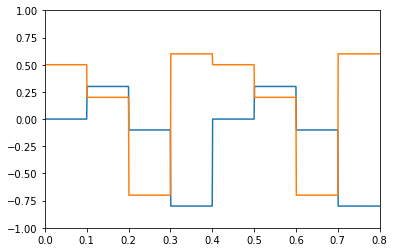

In [4]:
inputs = [[0, 0.5], [0.3, 0.2], [-0.1, -0.7], [-0.8, 0.6]]
process = nengo.processes.PresentInput(inputs, presentation_time=0.1)

tlen = 0.8
plt.figure()
plt.plot(process.trange(tlen), process.run(tlen))
plt.xlim([0, tlen])
plt.ylim([-1, 1])
plt.show();

In [ ]:
model = nengo.Network()
with model:
    inp = nengo.Node(WhiteSignal(60, high=5), size_out=2)
    pre = nengo.Ensemble(60, dimensions=2)
    nengo.Connection(inp, pre)
    post = nengo.Ensemble(60, dimensions=2)
    conn = nengo.Connection(pre, post, function=lambda x: np.random.random(2))
    inp_p = nengo.Probe(inp)
    pre_p = nengo.Probe(pre, synapse=0.01)
    post_p = nengo.Probe(post, synapse=0.01)